In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## Problem A : Graph Operations in Python
### Implement the following operations using Python:


##### <b>1. Draw a Simple Graph (Ensure n > 10)</b>

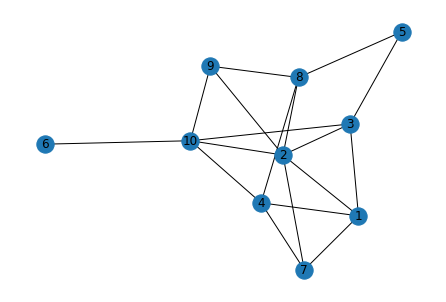

In [15]:
SimpleGraph = nx.Graph()
SimpleGraph.add_nodes_from(range(1, 11))
for i in range(1, 11):
    for j in range(1, 11):
        if i != j:
            if random.random() < 0.2:
                SimpleGraph.add_edge(i, j)

# Plot the graph
nx.draw(SimpleGraph, with_labels=True)
plt.show()

##### <b>2. Generate a Complete Graph (Ensure n > 10) </b>

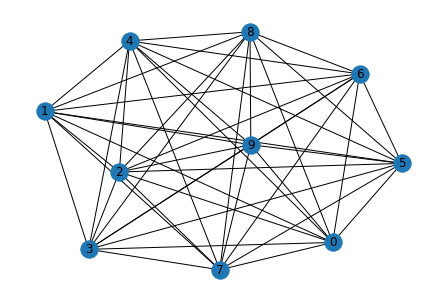

In [3]:
G=nx.complete_graph(10)
nx.draw(G, with_labels=True)
plt.show()

##### <b>3. Create Bipartite and Tripartite Graphs (Ensure n > 10). </b>


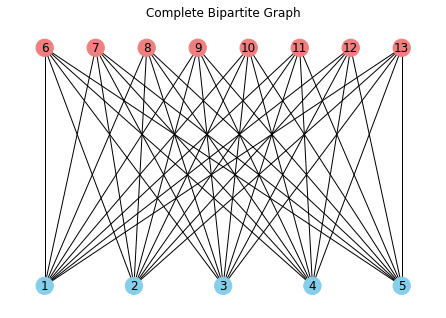

In [4]:
# Specify the number of nodes in each bipartite set
n_set1 = 5
n_set2 = 8

# Create a complete bipartite graph
G_bipartite = nx.Graph()

# Add nodes to each bipartite set
nodes_set1 = list(range(1, n_set1 + 1))
nodes_set2 = list(range(n_set1 + 1, n_set1 + n_set2 + 1))

G_bipartite.add_nodes_from(nodes_set1, bipartite=0)
G_bipartite.add_nodes_from(nodes_set2, bipartite=1)

# Add edges between bipartite sets
edges = [(u, v) for u in nodes_set1 for v in nodes_set2]
G_bipartite.add_edges_from(edges)

# Draw bipartite graph
pos_bipartite = nx.bipartite_layout(G_bipartite,nodes_set1, align="horizontal")
nx.draw(G_bipartite, pos=pos_bipartite, with_labels=True, node_color=['skyblue' if G_bipartite.nodes[v]['bipartite'] == 0 else 'lightcoral' for v in G_bipartite.nodes])
plt.title('Complete Bipartite Graph')
plt.show()

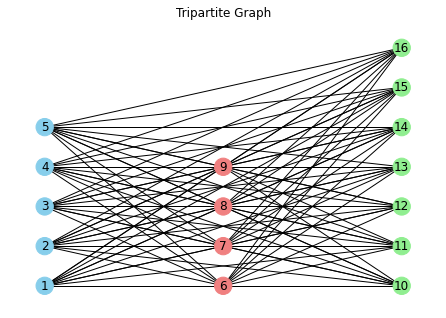

In [16]:
# Specify the number of nodes in each partition
n_set1 = 5
n_set2 = 4
n_set3 = 7

# Create a tripartite graph
G_tripartite = nx.Graph()

# Add nodes to each partition
nodes_set1 = list(range(1, n_set1 + 1))
nodes_set2 = list(range(n_set1 + 1, n_set1 + n_set2 + 1))
nodes_set3 = list(range(n_set1 + n_set2 + 1, n_set1 + n_set2 + n_set3 + 1))

G_tripartite.add_nodes_from(nodes_set1, bipartite=0)
G_tripartite.add_nodes_from(nodes_set2, bipartite=1)
G_tripartite.add_nodes_from(nodes_set3, bipartite=2)

# Add edges between all partitions
edges = [(u, v) for u in nodes_set1 for v in nodes_set2] + [(u, v) for u in nodes_set1 for v in nodes_set3] + [(u, v) for u in nodes_set2 for v in nodes_set3]
G_tripartite.add_edges_from(edges)

# Create positions for nodes with proper spacing
pos_tripartite = {
    node: (0, i * 2) if G_tripartite.nodes[node]['bipartite'] == 0 else (1, (i - n_set1) * 2) if G_tripartite.nodes[node]['bipartite'] == 1 else (2, (i - n_set1 - n_set2) * 2)
    for i, node in enumerate(G_tripartite.nodes)
}

# Draw tripartite graph
nx.draw(G_tripartite, pos=pos_tripartite, with_labels=True, node_color=['skyblue' if G_tripartite.nodes[v]['bipartite'] == 0 else 'lightcoral' if G_tripartite.nodes[v]['bipartite'] == 1 else 'lightgreen' for v in G_tripartite.nodes])
plt.title('Tripartite Graph')
plt.show()


##### <b>4. Apply Havel-Hakimi Theorem on a Simple Graph (as in 1) </b>

In [6]:
# degree sequence of a graph
def degree_sequence(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    return degree_sequence

degrees = degree_sequence(SimpleGraph)
print(degrees)

# Applying Havel Hakimi
def havel_hakimi(degrees):
    if len(degrees) == 0:
        return True
    if len(degrees) == 1:
        return degrees[0] == 0
    degrees.sort(reverse=True)
    if degrees[0] >= len(degrees):
        return False
    for i in range(1, degrees[0] + 1):
        degrees[i] -= 1
    degrees.pop(0)
    return havel_hakimi(degrees)

if havel_hakimi(degrees) == True:
    print("The graph is graphical")
else:
    print("The graph is not graphical")



[3, 3, 3, 3, 2, 2, 2, 1, 1, 0]
The graph is graphical


## Problem B : Choice 2

##### 1. Choose any two algorithms + Max-Flow (Augmenting Flow Algorithm). [i.e., Total 3 Algorithms]
1. Prim's Algorithm
2. Kruskal's Algorithm
3. Ford Flukerson's Algorithm

In [7]:
# Prim's Algorithm for Minimum Spanning Tree 

def prim(G):
    T = nx.Graph()
   # Choose a random starting node
    start_node = random.choice(list(G.nodes()))
    T.add_node(start_node)

    while set(T.nodes()) != set(G.nodes()):
        # Find the minimum-weight edge that connects a node in T to a node outside T
        candidate_edges = [(u, v, d) for u, v, d in G.edges(data=True) if (
            u in T.nodes() and v not in T.nodes()) or (v in T.nodes() and u not in T.nodes())]
        min_edge = min(candidate_edges, key=lambda x: x[2].get('weight', 1e9))

        # Add the edge to the minimum spanning tree
        T.add_edge(min_edge[0], min_edge[1],
                   weight=min_edge[2].get('weight', 1))

    return T

In [8]:
def kruskal(G):
    T = nx.Graph()
    
    # Create a disjoint set data structure to keep track of connected components
    sets = {node: {node} for node in G.nodes()}
    
    # Sort the edges of the graph by weight
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2].get('weight', 1e9))
    
    for edge in sorted_edges:
        u, v, data = edge
        set_u = sets[u]
        set_v = sets[v]
        
        # Check if adding the edge creates a cycle
        if set_u != set_v:
            # Add the edge to the minimum spanning tree
            T.add_edge(u, v, weight=data.get('weight', 1))
            
            # Merge the sets of the two connected components
            set_u.update(set_v)
            for node in set_v:
                sets[node] = set_u
    
    return T

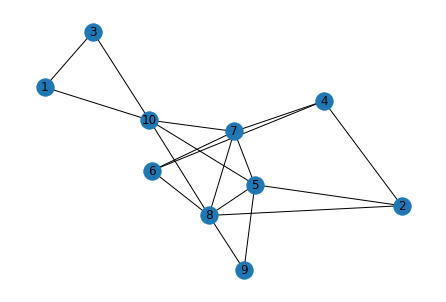

Graph with 10 nodes and 9 edges
[(6, 4, {'weight': 1}), (4, 2, {'weight': 1}), (2, 8, {'weight': 1}), (2, 5, {'weight': 3}), (8, 7, {'weight': 1}), (8, 10, {'weight': 6}), (5, 9, {'weight': 5}), (10, 3, {'weight': 6}), (3, 1, {'weight': 2})]
26


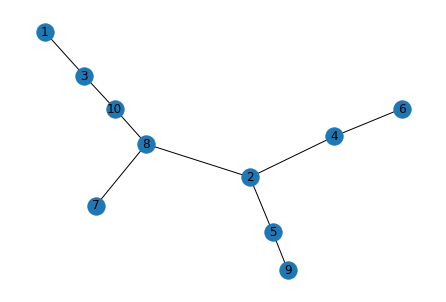

[(2, 8, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 3}), (8, 7, {'weight': 1}), (8, 10, {'weight': 6}), (4, 6, {'weight': 1}), (1, 3, {'weight': 2}), (3, 10, {'weight': 6}), (5, 9, {'weight': 5})]
26


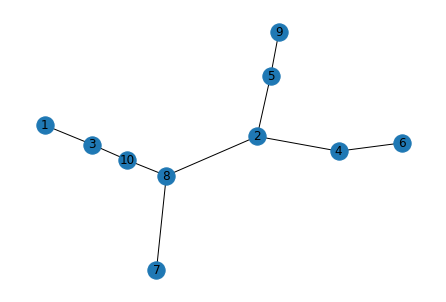

In [19]:
G = nx.Graph()
G.add_nodes_from(range(1, 11))
for i in range(1, 11):
    for j in range(1, 11):
        if i != j:
            if random.random() < 0.2:
                G.add_edge(i, j, weight=random.randint(1, 10))

# Original Graph
nx.draw(G, with_labels=True)
plt.show()

# Prim's Algorithm Graph
Graph_Prim = prim(G)
print(Graph_Prim.edges(data=True))
total_weight = sum([data['weight'] for _, _, data in Graph_Prim.edges(data=True)])
print(f"Total Cost :{total_weight}")


nx.draw(Graph_Prim, with_labels=True)
plt.show()

# Kruskal's Algorithm Graph
Graph_Kruskal = kruskal(G)
print(Graph_Kruskal.edges(data=True))
# calculate the total weight of the minimum spanning tree
total_weight = sum([data['weight'] for _, _, data in Graph_Kruskal.edges(data=True)])
print(f"Total Cost :{total_weight}")

nx.draw(Graph_Kruskal, with_labels=True)
plt.show()

[(1, 3, {'weight': 3}), (1, 7, {'weight': 5}), (2, 8, {'weight': 2}), (2, 10, {'weight': 4}), (4, 10, {'weight': 2}), (4, 6, {'weight': 7}), (5, 7, {'weight': 3}), (7, 8, {'weight': 1}), (9, 10, {'weight': 3})]


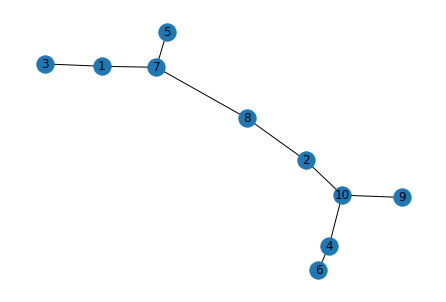

[(1, 3, {'weight': 3}), (1, 7, {'weight': 5}), (2, 8, {'weight': 2}), (2, 10, {'weight': 4}), (4, 10, {'weight': 2}), (4, 6, {'weight': 7}), (5, 7, {'weight': 3}), (7, 8, {'weight': 1}), (9, 10, {'weight': 3})]


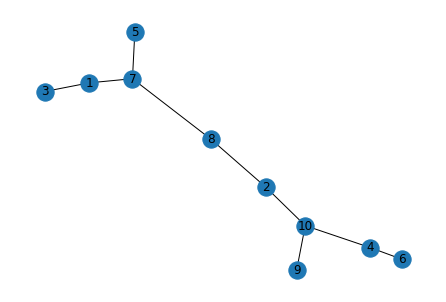

In [10]:
# using networkx library
Graph_Prim = nx.minimum_spanning_tree(G, algorithm='prim')
print(Graph_Prim.edges(data=True))

nx.draw(Graph_Prim, with_labels=True)
plt.show()

Graph_Kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')
print(Graph_Kruskal.edges(data=True))

nx.draw(Graph_Kruskal, with_labels=True)
plt.show()


In [11]:
"""
Ford Fulkerson Algorithm

Description:
    (1) Start with initial flow as 0
    (2) Choose the augmenting path from source to sink and add the path to flow
"""
graph = [
    [0, 16, 13, 0, 0, 0],
    [0, 0, 10, 12, 0, 0],
    [0, 4, 0, 0, 14, 0],
    [0, 0, 9, 0, 0, 20],
    [0, 0, 0, 7, 0, 4],
    [0, 0, 0, 0, 0, 0],
]


def breadth_first_search(graph, source, sink, parents):
    """
    This function returns True if there is a node that has not iterated.

    Args:
        graph: Adjacency matrix of graph
        source: Source
        sink: Sink
        parents: Parent list

    Returns:
        True if there is a node that has not iterated.

    >>> breadth_first_search(graph, 0, 5, [-1, -1, -1, -1, -1, -1])
    True
    >>> breadth_first_search(graph, 0, 6, [-1, -1, -1, -1, -1, -1])
    Traceback (most recent call last):
        ...
    IndexError: list index out of range
    """
    visited = [False] * len(graph)  # Mark all nodes as not visited
    queue = []  # breadth-first search queue

    # Source node
    queue.append(source)
    visited[source] = True

    while queue:
        u = queue.pop(0)  # Pop the front node
        # Traverse all adjacent nodes of u
        for ind, node in enumerate(graph[u]):
            if visited[ind] is False and node > 0:
                queue.append(ind)
                visited[ind] = True
                parents[ind] = u
    return visited[sink]


def ford_fulkerson(graph,source,sink):
    # This array is filled by breadth-first search and to store path
    parent = [-1] * (len(graph))
    max_flow = 0

    # While there is a path from source to sink
    while breadth_first_search(graph, source, sink, parent):
        path_flow = int(1e9)  # Infinite value
        s = sink

        while s != source:
            # Find the minimum value in the selected path
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]

        max_flow += path_flow
        v = sink

        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]

    return max_flow


if __name__ == "__main__":
    from doctest import testmod

    testmod()
    print(f"{ford_fulkerson(graph, source=0, sink=5) = }")
    


ford_fulkerson(graph, source=0, sink=5) = 23


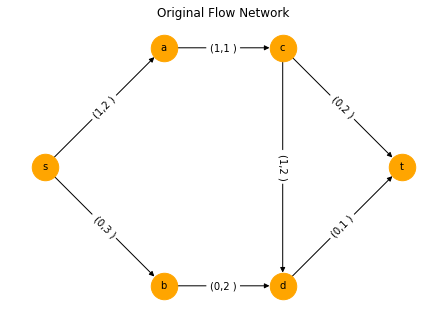

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge('s', 'a', capacity=2, flow=1)
G.add_edge('s', 'b', capacity=3, flow=0)
G.add_edge('a', 'c', capacity=1, flow=1)
G.add_edge('c', 't', capacity=2, flow=0)
G.add_edge('b', 'd', capacity=2, flow=0)
G.add_edge('c', 'd', capacity=2, flow=1)
G.add_edge('d', 't', capacity=1, flow=0)


# Visualize the original graph
pos = {'s': (0, 1), 'a': (1, 2), 'b': (1, 0),'c':(2,2) ,'d': (2,0),'t': (3, 1)}
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color='#FFA500', font_size=10, font_color='black')
capacity_labels = nx.get_edge_attributes(G, 'capacity')
weight_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {(u, v): f"({data['flow']},{data['capacity']} )" for u, v, data in G.edges(data=True)}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels )
plt.title('Original Flow Network')
plt.show()

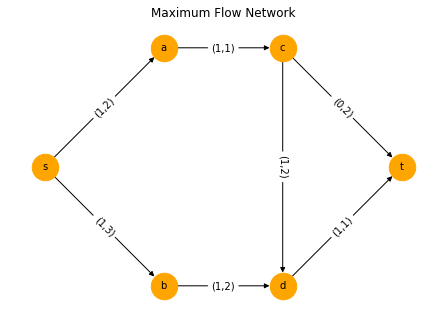

Maximum Flow: 1


In [13]:
import networkx as nx
import matplotlib.pyplot as plt


def augmenting_path_dfs(graph, source, sink, path=[]):
    if source == sink:
        return path
    for node in graph.neighbors(source):
        residual_capacity = graph[source][node]['capacity'] - graph[source][node]['flow']
        if residual_capacity > 0 and node not in path:
            result = augmenting_path_dfs(
                graph, node, sink, path + [(source, node)])
            if result is not None:
                return result


def ford_fulkerson(graph, source, sink):
    max_flow = 0
    path = augmenting_path_dfs(graph, source, sink)

    while path is not None:
        # Find the minimum residual capacity along the augmenting path
        residual_capacities = [graph[u][v]['capacity'] -
                               graph[u][v]['flow'] for u, v in path]
        min_residual_capacity = min(residual_capacities)

        # Update the flow along the augmenting path
        for u, v in path:
            graph[u][v]['flow'] += min_residual_capacity
            # graph[v][u]['flow'] -= min_residual_capacity

        # Update the maximum flow
        max_flow += min_residual_capacity

        # Find the next augmenting path
        path = augmenting_path_dfs(graph, source, sink)

    return max_flow


# Create the graph
G = nx.DiGraph()
G.add_edge('s', 'a', capacity=2, flow=1)
G.add_edge('s', 'b', capacity=3, flow=0)
G.add_edge('a', 'c', capacity=1, flow=1)
G.add_edge('c', 't', capacity=2, flow=0)
G.add_edge('b', 'd', capacity=2, flow=0)
G.add_edge('c', 'd', capacity=2, flow=1)
G.add_edge('d', 't', capacity=1, flow=0)

# Find the maximum flow
max_flow = ford_fulkerson(G, 's', 't')

# Visualize the final graph with flow values
pos = {'s': (0, 1), 'a': (1, 2), 'b': (1, 0),
       'c': (2, 2), 'd': (2, 0), 't': (3, 1)}
nx.draw(G, pos, with_labels=True, node_size=700,
        node_color='#FFA500', font_size=10, font_color='black')

# Add edge labels for flow and capacity
edge_labels = {
    (u, v): f"({G[u][v]['flow']},{G[u][v]['capacity']})" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Maximum Flow Network')
plt.show()

print(f"Maximum Flow: {max_flow}")


In [14]:
G = nx.MultiDiGraph()
G.add_edge('s', 'a', capacity=2, flow=1)
G.add_edge('s', 'b', capacity=3, flow=0)
G.add_edge('a', 'c', capacity=1, flow=1)
G.add_edge('c', 't', capacity=2, flow=0)
G.add_edge('b', 'd', capacity=2, flow=0)
G.add_edge('c', 'd', capacity=2, flow=1)
G.add_edge('d', 't', capacity=1, flow=1)

for nodes in G.neighbors('d'):
    print(nodes)

t
